### Intall required libraries

In [2]:
# Installing the required libraries

!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Libraries

In [3]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Load the data

In [4]:
# Loading the train data
train_df = pd.read_csv('train.csv')

# Loading the test data
test_df = pd.read_csv('test.csv')

In [6]:
# Viewing first few rows to verify the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Explore Data

In [8]:
# Checking the data types and missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Displaying the Summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


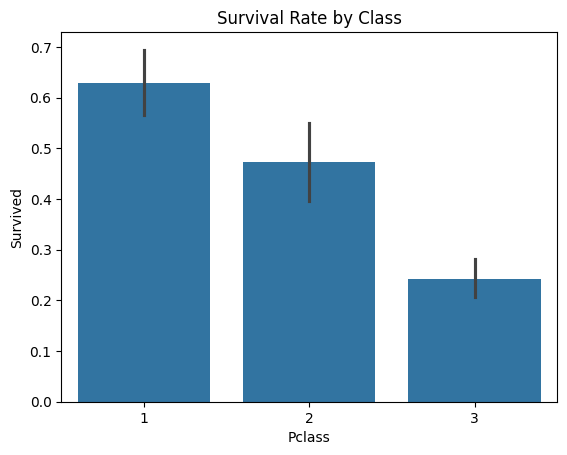

In [10]:
# Visualizing the survival rate by class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Class')
plt.show()

### Preprocess the Data

In [11]:
def preprocess_data(df):
    # Filling the missing Age with median
    df['Age'] = df['Age'].fillna(df['Age'].median())
    
    # Filling the missing Embarked with mode
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    
    # Filling the missing Fare with median
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    
    # Droping the Cabin (too many missing values)
    df.drop('Cabin', axis=1, inplace=True)
    
    # Converting the Sex to numerical
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)
    
    # One-hot encoding the Embarked
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    
    # Drop unnecessary columns
    df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
    
    return df

# Apply preprocessing
train_df_clean = preprocess_data(train_df.copy())
test_df_clean = preprocess_data(test_df.copy())

### Prepare Training and Validation Sets

In [12]:
# Defining the features and the target
X = train_df_clean.drop('Survived', axis=1)
y = train_df_clean['Survived']

# Spliting into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a Model (Random Forest Classifier)

In [13]:
# Initializing and training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating
val_preds = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))

Validation Accuracy: 0.7988826815642458


### Make Predictions on Test Set

In [14]:
# Predicting on the test data
test_preds = model.predict(test_df_clean)

# Creating the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_preds
})

### Save Submission File

In [15]:
# Saving the submission file
submission.to_csv('submission.csv', index=False)

In [16]:
import pandas as pd
df_submission = pd.read_csv('submission.csv')
print(df_submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0
